In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.duplicated().sum()

240

In [8]:
data[data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
data.shape

(1599, 12)

In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [13]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [14]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((910, 11), (449, 11), (910,), (449,))

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = dt.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print(f"The test accuracy for decision tree model without scaling data is: {round(accuracy_score(y_test, y_pred),2)}")
print(f"The training accuracy for decision tree model without scaling data is: {round(dt.score(X_train, y_train),2)}")

The test accuracy for decision tree model without scaling data is: 0.5
The training accuracy for decision tree model without scaling data is: 1.0


In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.score(X_train, y_train)

0.5901098901098901

In [21]:
y_pred_logistic = logistic.predict(X_test)
print(f"The test accuracy for logsitic regression is: {round(accuracy_score(y_test, y_pred_logistic), 2)}")
print(f"The training accuracy for logistic regression is: {round(logistic.score(X_train, y_train),2)}")

The test accuracy for logsitic regression is: 0.55
The training accuracy for logistic regression is: 0.59


In [22]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [23]:
y_pred_svc = svc.predict(X_test)

print(f"The test accuracy for svc is: {round(accuracy_score(y_test, y_pred_svc),2)}")
print(f"The training accuracy for svc is: {round(svc.score(X_train, y_train),2)}")

The test accuracy for svc is: 0.48
The training accuracy for svc is: 0.51


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid_param = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(2,32,1),
    "min_samples_leaf" : range(1, 10, 1),
    "min_samples_split" : range(2, 10, 1),
    "splitter" : ["best", "random"]
}

In [26]:
grid_search = GridSearchCV(estimator=dt, param_grid=grid_param, cv=5)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [28]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 8,
 'splitter': 'random'}

In [29]:
dt_with_hyperparameter = DecisionTreeClassifier(criterion = 'gini',
                                                max_depth = 6,
                                                min_samples_leaf = 2,
                                                min_samples_split = 3,
                                                splitter =  'random'
)

In [30]:
dt_with_hyperparameter.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=3,
                       splitter='random')

In [31]:
y_pred_dt_hyperparameter = dt_with_hyperparameter.predict(X_test)
print(f"The test accuracy after hyperparameter tuning the dt is: {round(accuracy_score(y_test, y_pred_dt_hyperparameter),2)}")

The test accuracy after hyperparameter tuning the dt is: 0.52


[Text(0.6121323529411765, 0.9285714285714286, 'x[10] <= 11.745\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.39705882352941174, 0.7857142857142857, 'x[6] <= 102.753\ngini = 0.617\nsamples = 784\nvalue = [7, 30, 379, 293, 71, 4]'),
 Text(0.23529411764705882, 0.6428571428571429, 'x[9] <= 0.71\ngini = 0.629\nsamples = 718\nvalue = [7, 29, 320, 288, 70, 4]'),
 Text(0.11764705882352941, 0.5, 'x[9] <= 0.541\ngini = 0.597\nsamples = 528\nvalue = [6, 28, 269, 196, 27, 2]'),
 Text(0.058823529411764705, 0.35714285714285715, 'x[10] <= 10.339\ngini = 0.477\nsamples = 166\nvalue = [4, 13, 114, 35, 0, 0]'),
 Text(0.029411764705882353, 0.21428571428571427, 'x[10] <= 9.086\ngini = 0.419\nsamples = 133\nvalue = [1, 10, 98, 24, 0, 0]'),
 Text(0.014705882352941176, 0.07142857142857142, 'gini = 0.64\nsamples = 5\nvalue = [0, 2, 2, 1, 0, 0]'),
 Text(0.04411764705882353, 0.07142857142857142, 'gini = 0.401\nsamples = 128\nvalue = [1, 8, 96, 23, 0, 0]'),
 Text(0.08823529411764706

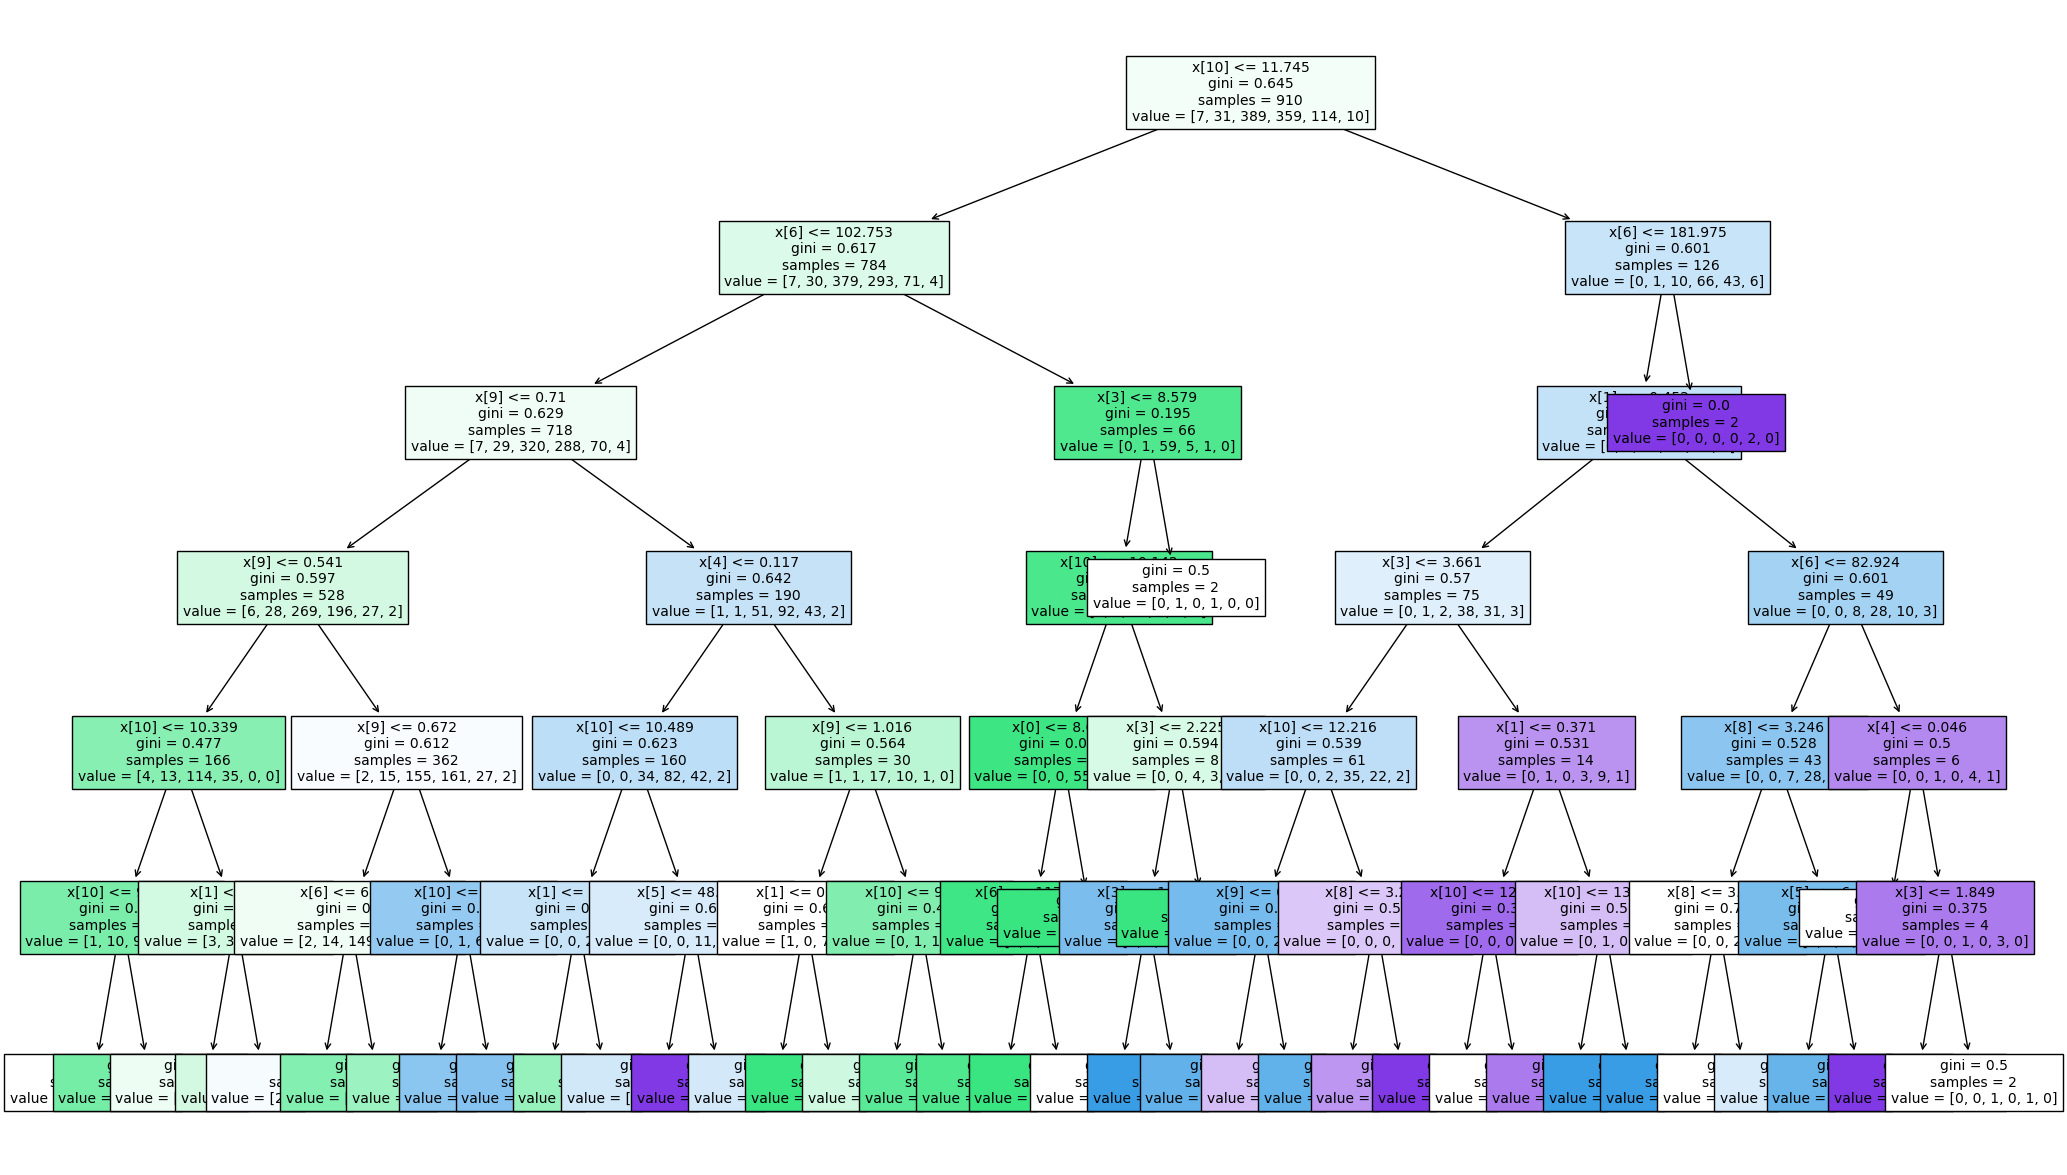

In [32]:
from sklearn import tree
fig = plt.figure(figsize=(25, 15))
tree.plot_tree(dt_with_hyperparameter, filled=True, fontsize=10)